## Case Background
The goal of this project is to conduct an in-depth analysis of the UEFA Champions League (UCL) using historical data from 1955 to 2023. By leveraging match performance and final results data, aiming to uncover patterns, trends, and insights that have shaped the tournament over the decades.

## Data Description
[The dataset here](https://www.kaggle.com/datasets/fardifaalam170041060/champions-league-dataset-1955-2023). It contains the following fields:

All-Time Performance Dataset
* **Team:** The team name
* **Matches:** Number of matches played
* **Wins:** Wins
* **Draws:** Draws
* **Losses:** Losses
* **Goals_Scored:** Goals scored
* **Goals_Conceded:** Goals conceded
* **Goal_Difference:** Goal difference (difference between goals scored and goals conceded)
* **Points:** Total points accumulated by the team

UEFA Finals Dataset (1955-2023):
* **Season:** The season of the final
* **Country:** Country of the winning team
* **Winners:** The team that won the final
* **Score:** Final match score
* **Runners-up:** The team that lost the final
* **Country_Runners-up:** The team that lost the final
* **Venue:** Additional match details
* **Attendance:** Additional match details
* **Notes:** Additional match details

## Data Cleaning & Preparation

In [1]:
import pandas as pd
df = pd.read_csv('UCL_AllTime_Performance_Table.csv')
df2 = pd.read_csv('UCL_Finals_1955-2023.csv') 


In [3]:
df.head()
df.dtypes
df2.head()
df2.dtypes

Season         object
Country        object
Winners        object
Score          object
Runners-up     object
Country.1      object
Venue          object
Attend­ance    object
Notes          object
dtype: object

In [5]:
# Checking for duplicates
df.duplicated().sum()
df2.duplicated().sum()

0

In [7]:
# Checking for missing values
df.isnull().sum()

# Checking for missing values
df2.isnull().sum()


Season          0
Country         0
Winners         0
Score           0
Runners-up      0
Country.1       0
Venue           0
Attend­ance     0
Notes          51
dtype: int64

In [9]:
# Renaming the columns 
df.columns = ['Rank', 'Team', 'Matches', 'Wins', 'Draws', 'Losses', 'Goals', 'Goal_Difference', 'Points']

# Renaming the columns
df2.columns = ['Season', 'Country', 'Winners', 'Score', 'Runners-up', 'Country_RunnersUp', 'Venue', 'Attendance', 'Notes']

# Filling the missing values in rank in order
df['Rank'] = range(1, len(df) + 1)

In [11]:
# Checking for the missing values again 
df.isnull().sum()

Rank               0
Team               0
Matches            0
Wins               0
Draws              0
Losses             0
Goals              0
Goal_Difference    0
Points             0
dtype: int64

In [13]:
# Split the "Goals" column into "Goals_Scored" and "Goals_Conceded"
df[['Goals_Scored', 'Goals_Conceded']] = df['Goals'].str.split(':', n=1, expand=True)

# Remove the trailing ':00' from 'Goals_Conceded'
df['Goals_Conceded'] = df['Goals_Conceded'].str.split(':').str[0]

# Converting to integer type
df['Goals_Scored'] = df['Goals_Scored'].astype(int)
df['Goals_Conceded'] = df['Goals_Conceded'].astype(int)

# Dropping the original "Goals" column
df.drop(columns=['Goals'], inplace=True)


In [15]:
# Filling the missing values in Notes to indicate the game was finished in full-time
df2['Notes'] = df2['Notes'].fillna('Match was won during full time')

In [17]:
# Checking for the missing values again 
df.isnull().sum()

Rank               0
Team               0
Matches            0
Wins               0
Draws              0
Losses             0
Goal_Difference    0
Points             0
Goals_Scored       0
Goals_Conceded     0
dtype: int64

In [19]:
df2.Attendance

0      38,239
1     124,000
2      67,000
3      72,000
4     127,621
       ...   
64     63,272
65          0
66     14,110
67     75,000
68     71,412
Name: Attendance, Length: 69, dtype: object

In [21]:
# Converting Attendance to numeric value 
df2['Attendance'] = df2['Attendance'].str.replace(',', '').str.strip()
df2['Attendance'] = pd.to_numeric(df2['Attendance'], errors='coerce')
df2['Attendance'].head()

0     38239
1    124000
2     67000
3     72000
4    127621
Name: Attendance, dtype: int64

In [23]:
# Outlier Detection Z-Score method for Attendance
mean_att = df2.Attendance.mean()
std_dev_att = df2.Attendance.std()
df2['z_score'] = (df2.Attendance - mean_att) / std_dev_att
df2['is_outlier_z'] = df2.z_score.abs() > 3
df2.loc[~df2['is_outlier_z'], :]


,Season,Country,Winners,Score,Runners-up,Country_RunnersUp,Venue,Attendance,Notes,z_score,is_outlier_z
0,1955–56,Spain,Real Madrid,4–3,Reims,France,"Parc des Princes, Paris, France",38239,Match was won during full time,-1.221238,False
1,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,"Santiago Bernabéu, Madrid, Spain",124000,Match was won during full time,2.865666,False
2,1957–58,Spain,Real Madrid,3–2,AC Milan,Italy,"Heysel Stadium, Brussels, Belgium",67000,Match was won during extra time,0.149356,False
3,1958–59,Spain,Real Madrid,2–0,Reims,France,"Neckarstadion, Stuttgart, West Germany",72000,Match was won during full time,0.387629,False
5,1960–61,Portugal,SL Benfica,3–2,FC Barcelona,Spain,"Wankdorf Stadium, Bern, Switzerland",26732,Match was won during full time,-1.769599,False
...,...,...,...,...,...,...,...,...,...,...,...
63,2017–18,Spain,Real Madrid,3–1,Liverpool FC,England,"NSC Olimpiyskiy Stadium, Kyiv, Ukraine",61561,Match was won during full time,-0.109838,False
64,2018–19,England,Liverpool FC,2–0,Tottenham Hotspur,England,"Metropolitano Stadium, Madrid, Spain",63272,Match was won during full time,-0.028301,False
66,2020–21,England,Chelsea FC,1–0,Manchester City,England,"Estádio do Dragão, Porto, Portugal",14110,Match was won during full time,-2.371095,False
67,2021–22,Spain,Real Madrid,1–0,Liverpool FC,England,"Stade de France, Saint-Denis, France",75000,Match was won during full time,0.530592,False


In [25]:
outliers_df = df2[df2['is_outlier_z']]
outliers_df

,Season,Country,Winners,Score,Runners-up,Country_RunnersUp,Venue,Attendance,Notes,z_score,is_outlier_z
4,1959–60,Spain,Real Madrid,7–3,Eintracht Frankfurt,West Germany,"Hampden Park, Glasgow, Scotland",127621,Match was won during full time,3.038224,True
65,2019–20,Germany,Bayern Munich,1–0,Paris Saint-Germain,France,"Estádio da Luz, Lisbon, Portugal",0,Match was won during full time,-3.043501,True


In [27]:
original_count = df2.shape[0]
original_count

69

In [29]:
df2 = df2.loc[~df2['is_outlier_z'], :]

In [31]:
new_count = df2.shape[0]
new_count

67

## Exploratory Data Analysis

### Wins by Teams & Countries

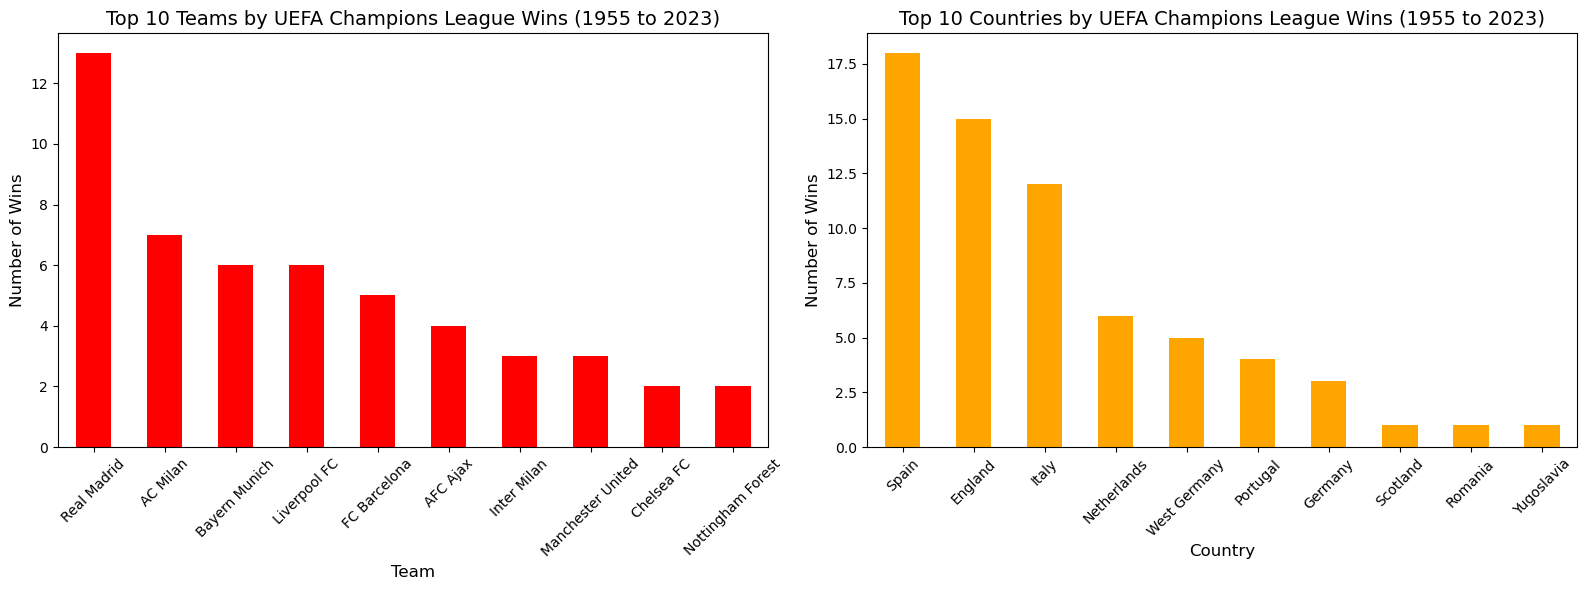

In [69]:
winners_count = df2['Winners'].value_counts()
country_wins = df2['Country'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

winners_count.head(10).plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title('Top 10 Teams by UEFA Champions League Wins (1955 to 2023)', fontsize=14)
axes[0].set_xlabel('Team', fontsize=12)
axes[0].set_ylabel('Number of Wins', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

country_wins.head(10).plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Top 10 Countries by UEFA Champions League Wins (1955 to 2023)', fontsize=14)
axes[1].set_xlabel('Country', fontsize=12)
axes[1].set_ylabel('Number of Wins', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Wins, Draws, and Losses for Top 10 Teams

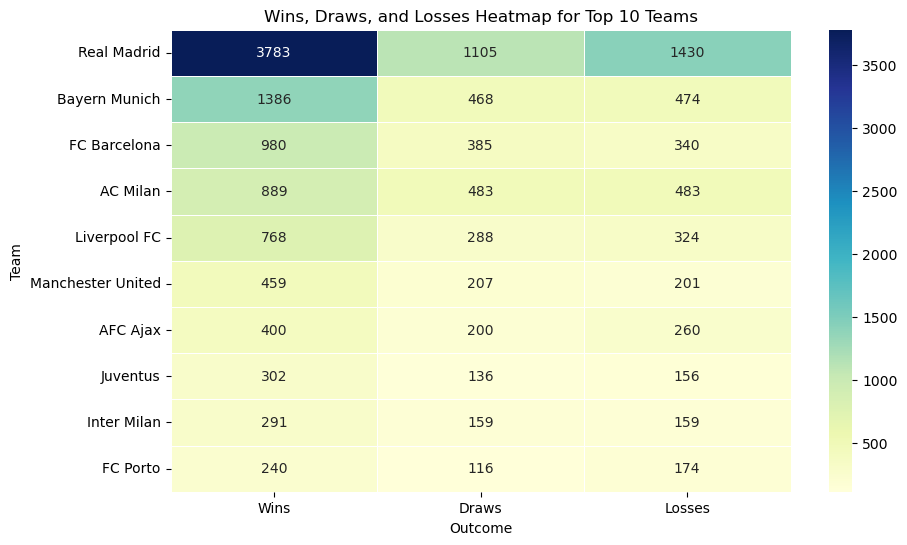

In [105]:
import seaborn as sns

heatmap_data = merged_df[['Team', 'Wins', 'Draws', 'Losses']].groupby('Team').sum()

heatmap_data = heatmap_data.sort_values('Wins', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title('Wins, Draws, and Losses Heatmap for Top 10 Teams')
plt.xlabel('Outcome')
plt.ylabel('Team')
plt.show()

### Rank vs Points

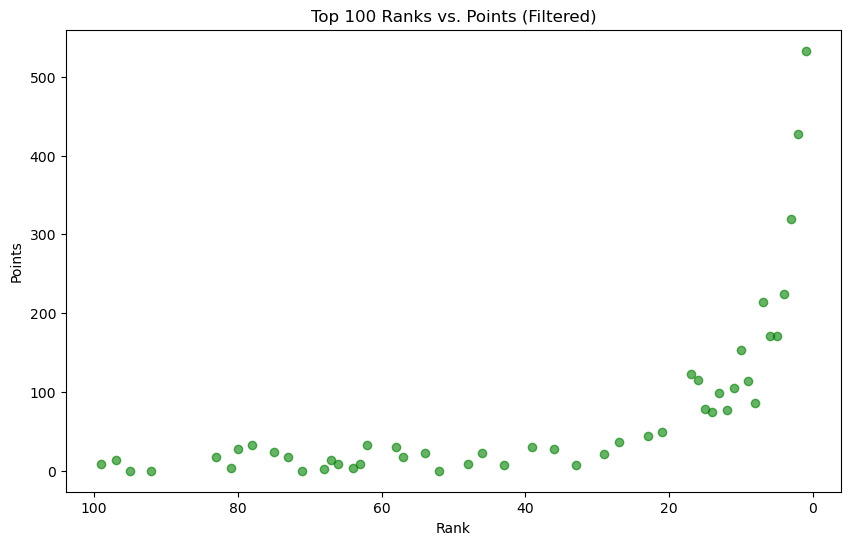

In [39]:
df_filtered = df[(df['Points'] >= 0) & (df['Rank'] <= 100)]

plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Rank'], df_filtered['Points'], color='green', alpha=0.6)
plt.title('Top 100 Ranks vs. Points (Filtered)')
plt.xlabel('Rank')
plt.ylabel('Points')
plt.gca().invert_xaxis()
plt.show()

### Attendance per Venue

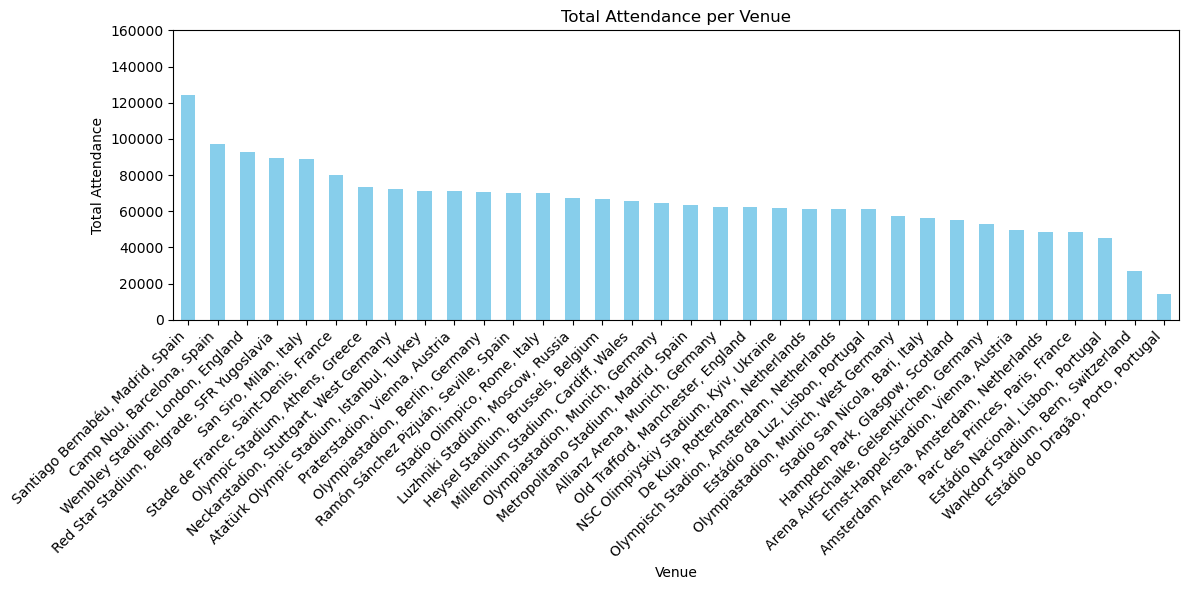

In [37]:
attendance_per_venue = df2.groupby('Venue')['Attendance'].max().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
attendance_per_venue.plot(kind='bar', color='skyblue')
plt.title('Total Attendance per Venue')
plt.xlabel('Venue')
plt.ylabel('Total Attendance')
plt.xticks(rotation=45, ha='right')


plt.ylim(0, attendance_per_venue.max() + 20000)
plt.yticks(range(0, int(attendance_per_venue.max()) + 40000, 20000))

plt.tight_layout()
plt.show()

### Attendance vs Goals Scored/Conceded and Rank vs Attendance

C:\Users\dshog\anaconda3\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


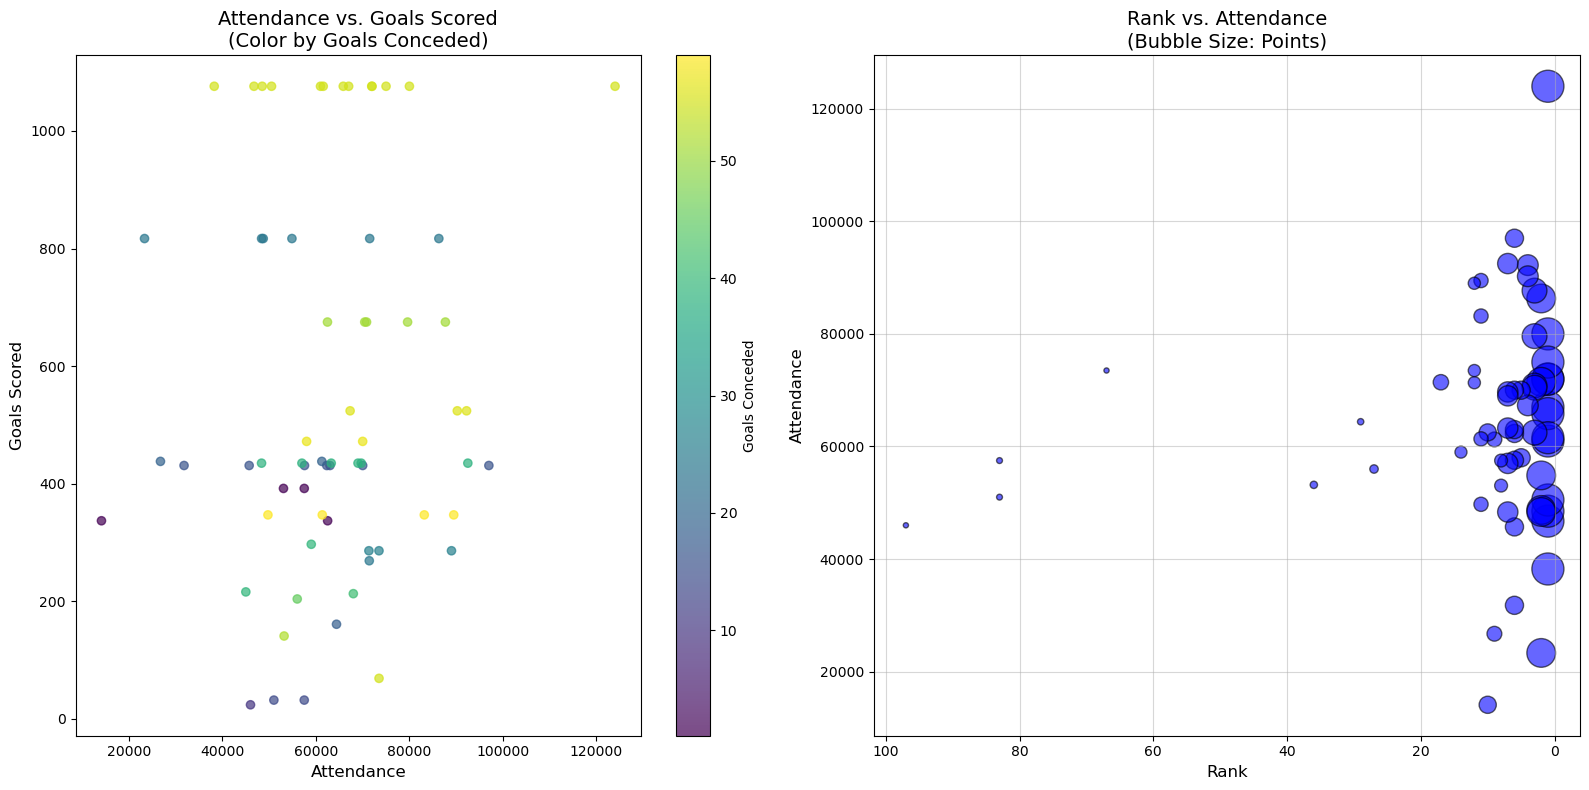

In [100]:
merged_df['Attendance'] = pd.to_numeric(merged_df['Attendance'], errors='coerce')

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

scatter = axes[0].scatter(
    merged_df['Attendance'], 
    merged_df['Goals_Scored'], 
    c=merged_df['Goals_Conceded'], 
    cmap='viridis', 
    alpha=0.7
)
axes[0].set_title('Attendance vs. Goals Scored\n(Color by Goals Conceded)', fontsize=14)
axes[0].set_xlabel('Attendance', fontsize=12)
axes[0].set_ylabel('Goals Scored', fontsize=12)
fig.colorbar(scatter, ax=axes[0], label='Goals Conceded')

bubble = axes[1].scatter(
    merged_df['Rank'], 
    merged_df['Attendance'], 
    s=merged_df['Points'], 
    alpha=0.6, 
    color='blue', 
    edgecolor='black'
)
axes[1].set_title('Rank vs. Attendance\n(Bubble Size: Points)', fontsize=14)
axes[1].set_xlabel('Rank', fontsize=12)
axes[1].set_ylabel('Attendance', fontsize=12)
axes[1].invert_xaxis()
axes[1].grid(alpha=0.5)

plt.tight_layout()
plt.show()

### Visualizing Matches Played by Teams

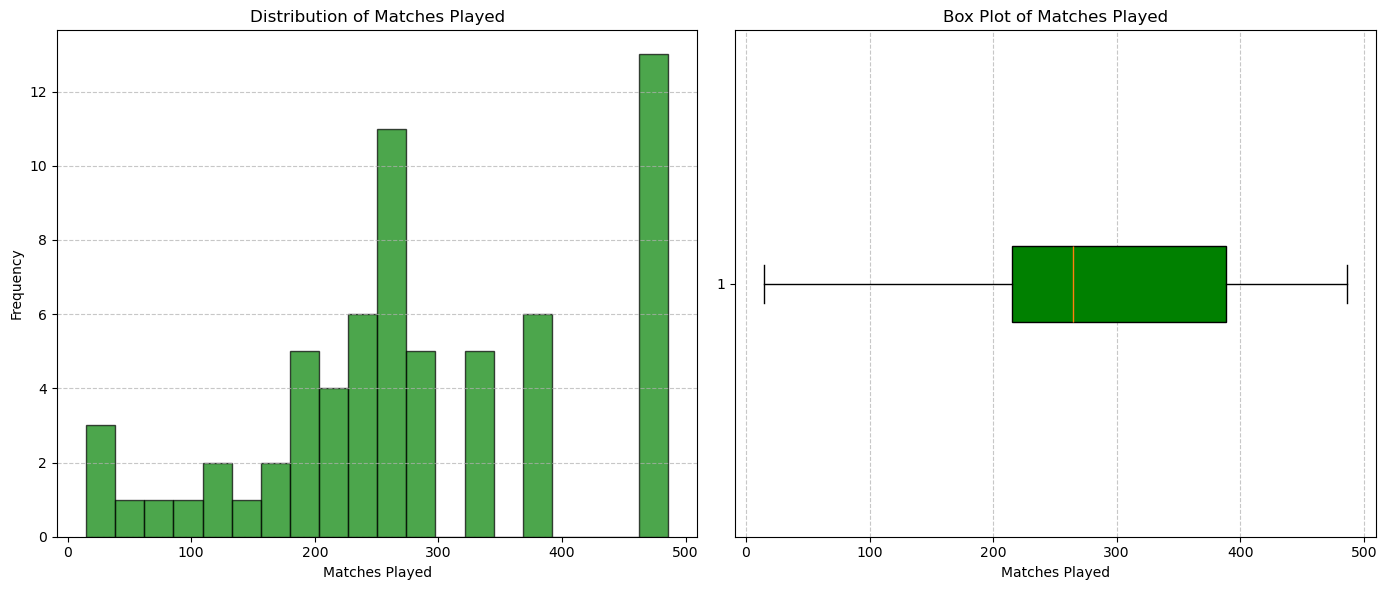

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].hist(merged_df['Matches'], bins=20, color='green', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Matches Played')
axes[0].set_xlabel('Matches Played')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].boxplot(merged_df['Matches'], vert=False, patch_artist=True, boxprops=dict(facecolor='green'))
axes[1].set_title('Box Plot of Matches Played')
axes[1].set_xlabel('Matches Played')
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Goal Differance and Attendance

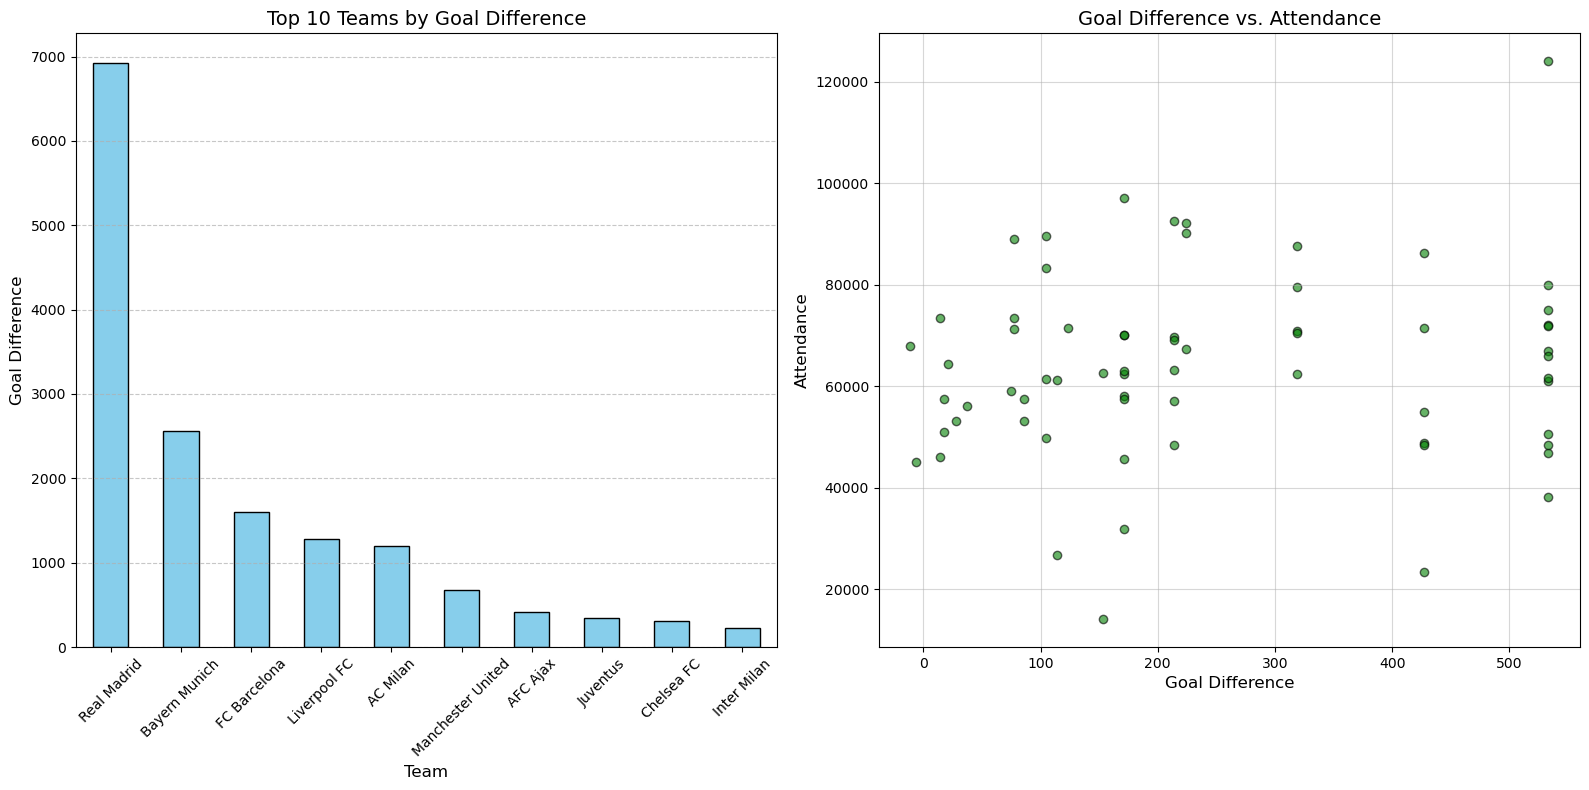

In [120]:
goal_difference = merged_df[['Team', 'Goal_Difference']].groupby('Team').sum()
goal_difference = goal_difference.sort_values('Goal_Difference', ascending=False).head(10)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

goal_difference['Goal_Difference'].plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Top 10 Teams by Goal Difference', fontsize=14)
axes[0].set_xlabel('Team', fontsize=12)
axes[0].set_ylabel('Goal Difference', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].scatter(merged_df['Goal_Difference'], merged_df['Attendance'], color='green', alpha=0.6, edgecolor='black')
axes[1].set_title('Goal Difference vs. Attendance', fontsize=14)
axes[1].set_xlabel('Goal Difference', fontsize=12)
axes[1].set_ylabel('Attendance', fontsize=12)
axes[1].grid(alpha=0.5)

plt.tight_layout()
plt.show()